# Лабораторная работа №4: Частотный анализ формул численного интегрирования

Выполнили студенты гр. 2384 Исмаилов Максим Владимирович и Дамакин Роман Павлович. Вариант №15.

## Цель работы

Провести анализ частотных характеристик известных формул
численного интегрирования.

## Основные теоретические положения

Формула прямоугольников:

$$y_{n+1} = y_n + s_{n+\frac{1}{2}}, \quad y_0 = 0$$

Формула трапеций:

$$y_{n+1} = y_n + \frac{1}{2} (s_{n} + s_{n+1}), \quad y_0 = 0$$

Формула Симпсона:

$$y_{n+1} = y_{n-1} + \frac{1}{3} (s_{n-1} + 4s_{n} + s_{n+1}), \quad y_0 = 0$$

Формула для интегрирования по «правилу 3/8»:

$$y_{n+2} = y_{n-1} + \frac{1}{8} (x_{n+2} + 3 x_{n+1} + 3 x_n + x_{n-1})$$

Формула Эйлера:

$$e^{ix} = \cos(x) + i\sin(x)$$

## Постановка задачи

Получить формулы для передаточных функций рекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для различных квадратурных формул и построить графики ${\tilde H(f)}$. Проинтерпретировать частотные свойства передаточных функций. Получить формулы для передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам Ньютона-Котеса различного порядка. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных квадратурных формул.

## Выполнение работы

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


frequences = np.linspace(1e-10, 0.5, 600)
plot_legend = ['Формула прямоугольников', 'Формула трапеций',
'Формула Симпсона']
colors = ['red', 'green', 'blue']

## Задание 1

***Квадратурная формула прямоугольников:***

$y_{n+1} = y_n + s_{n+\frac{1}{2}}, \quad y_0 = 0$

Пусть $s_n = e^{iwn}$, $y_n = H(w) e^{iwn}$

$H(w) e^{iw(n+1)} = H(w) e^{iwn} + e^{iw\left(n+\frac{1}{2}\right)}$

$H(w) e^{iwn} e^{iw} = H(w) e^{iwn} + e^{iwn} e^{\left(\frac{iw}{2}\right)}$

$H(w) e^{iwn} (e^{iw} - 1) = e^{iwn} e^{\left(\frac{iw}{2}\right)}$

$H(w) (e^{iw} - 1) = e^{\left(\frac{iw}{2}\right)}$

$H(w) = \frac{e^{(0.5iw)}}{e^{iw} - 1} = \frac{e^{(0.5iw)} \cdot e^{(-0.5iw)}}{(e^{iw} - 1) \cdot e^{(-0.5iw)}} = \frac{1}{e^{(0.5iw)} - e^{(-0.5iw)}} = \frac{1}{cos(0.5w) + i \cdot sin(0.5w) - cos(-0.5w) - i \cdot sin(-0.5w)} = \frac{1}{cos(0.5w) + i \cdot sin(0.5w) - cos(0.5w) + i \cdot sin(0.5w)} = \frac{1}{2 \cdot i \cdot sin(0.5w)}$

Точное значение интеграла $e^{iwt}$ равно $\frac{e^{iwt}}{iw}$

Отношение значений:

$\gamma = \frac{Вычисленное}{Точное} = \frac{i \cdot w}{2 \cdot i \cdot sin(0.5w)} = \frac{0.5w}{sin(0.5w)}$

***Квадратурная формула трапеций:***

$y_{n+1} = y_n + \frac{1}{2} (s_{n} + s_{n+1}), \quad y_0 = 0$

Пусть $s_n = e^{iwn}$, $y_n = H(w) e^{iwn}$

$H(w) e^{iw(n+1)} = H(w) e^{iwn} + \frac{1}{2} (e^{iwn} + e^{iw(n+1)})$

$H(w) e^{iwn} e^{iw} = H(w) e^{iwn} + \frac{1}{2} (e^{iwn} + e^{iwn} e^{iw})$

$H(w) e^{iwn} (e^{iw} - 1) = \frac{1}{2} e^{iwn} (1 + e^{iw})$

$H(w) (e^{iw} - 1) = \frac{1}{2} (1 + e^{iw})$

$H(w)  = \frac{e^{iw} + 1}{2 (e^{iw} - 1)} = \frac{(e^{iw} + 1) e^{-0.5iw}}{2 (e^{iw} - 1) e^{-0.5iw}} = \frac{e^{0.5iw} + e^{-0.5iw}}{2 (e^{0.5iw} - e^{-0.5iw})} = \frac{2 cos(0.5w)}{2 \cdot 2 \cdot i \cdot sin(0.5w)} = \frac{cos(0.5w)}{2 \cdot i \cdot sin(0.5w)}$

Точное значение интеграла $e^{iwt}$ равно $\frac{e^{iwt}}{iw}$

Отношение значений:

$\gamma = \frac{Вычисленное}{Точное} = \frac{cos(0.5w) \cdot i \cdot w}{2 \cdot i \cdot sin(0.5w)} = \frac{cos(0.5w) \cdot 0.5 w}{sin(0.5w)}$

***Квадратурная формула Симпсона:***

$y_{n+1} = y_{n-1} + \frac{1}{3} (s_{n-1} + 4s_{n} + s_{n+1}), \quad y_0 = 0$

Пусть $s_n = e^{iwn}$, $y_n = H(w) e^{iwn}$

$H(w) e^{iw(n+1)} = H(w) e^{iw(n-1)} + \frac{1}{3} (e^{iw(n-1)} + 4e^{iwn} + e^{iw(n+1)})$

$H(w) e^{iwn} e^{iw} = H(w) e^{iwn} e^{-iw} + \frac{1}{3} (e^{iwn} e^{-iw} + 4e^{iwn} + e^{iwn} e^{iw})$

$H(w) e^{iwn} (e^{iw} - e^{-iw}) = \frac{1}{3} e^{iwn} (e^{-iw} + 4 + e^{iw})$

$H(w) (e^{iw} - e^{-iw}) = \frac{1}{3} (e^{-iw} + 4 + e^{iw})$

$H(w) = \frac{4 + e^{iw} + e^{-iw}}{3 (e^{iw} - e^{-iw})} = \frac{4 + 2cos(w)}{3 \cdot 2 \cdot i \cdot sin(w)} = \frac{2 + cos(w)}{3 \cdot i \cdot sin(w)}$

Точное значение интеграла $e^{iwt}$ равно $\frac{e^{iwt}}{iw}$

Отношение значений:

$\gamma = \frac{Вычисленное}{Точное} = \frac{(2 + cos(w)) \cdot i \cdot w}{3 \cdot i \cdot sin(w)} = \frac{(2 + cos(w)) \cdot w}{3 \cdot sin(w)}$

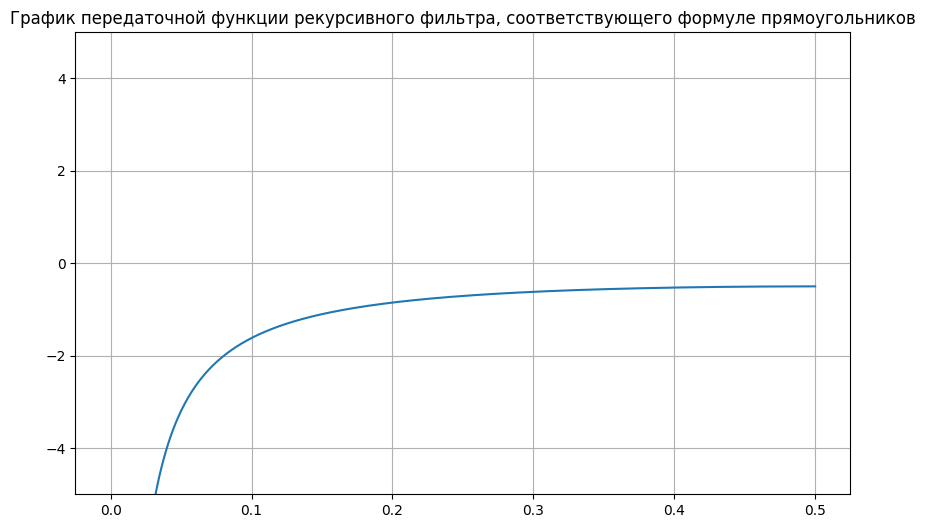

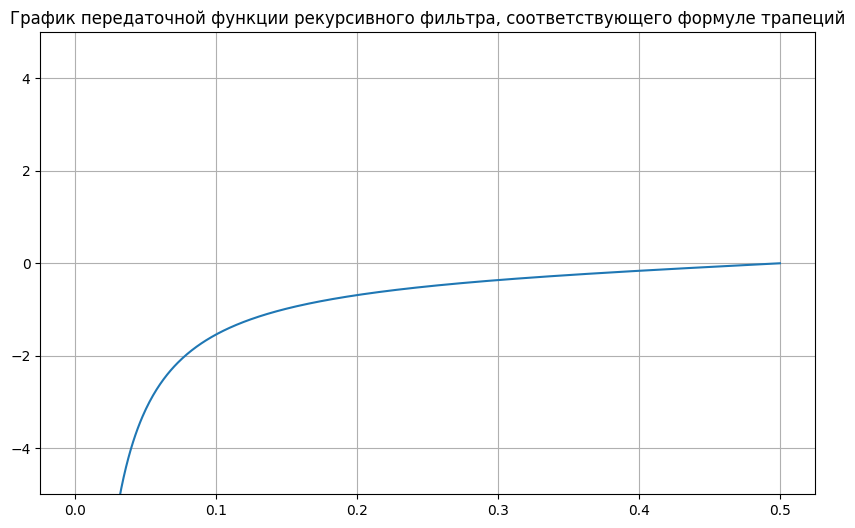

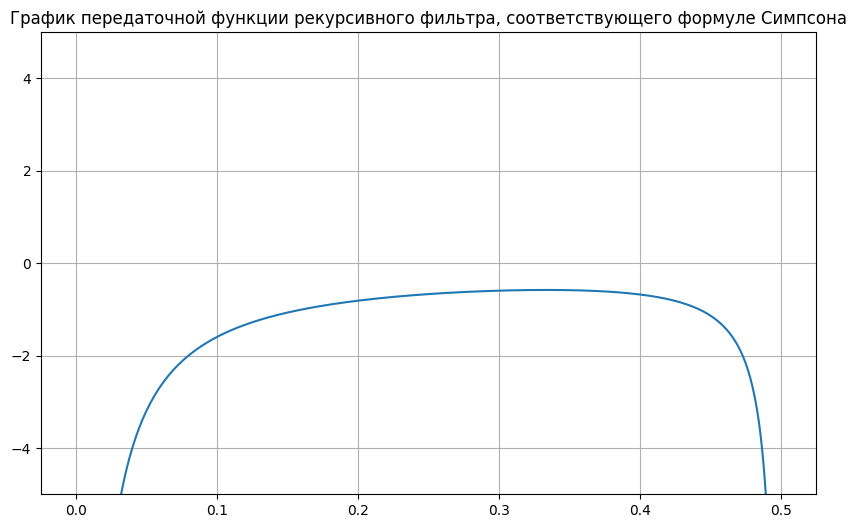

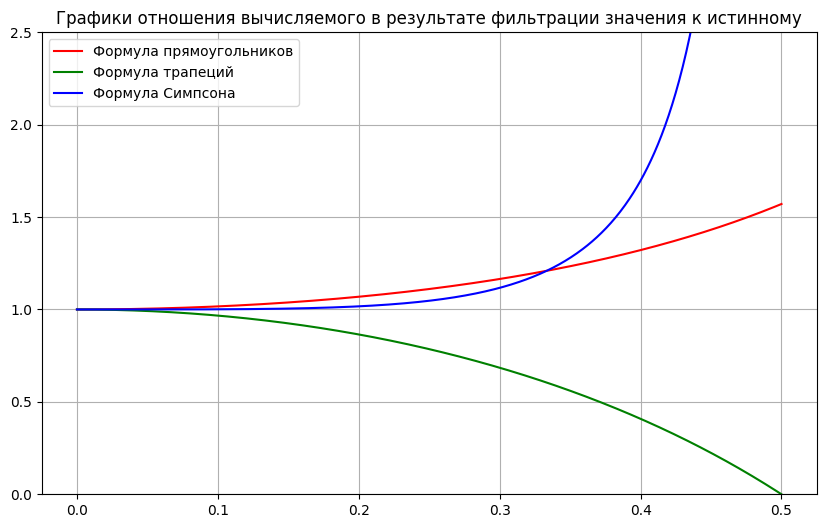

In [ ]:
def model_transfer_function_for_Simpson(frequences):
    return ((np.cos(2 * np.pi * frequences) + 2)/ (3j * np.sin(2 *
np.pi * frequences))).imag

def model_transfer_function_for_rectangle(frequences):
    return (1 / (np.sin(np.pi * frequences) * 2j)).imag

def model_transfer_function_for_trapezoid(frequences):
   return (np.cos(np.pi * frequences) / (2j * np.sin(frequences *
np.pi))).imag

def model_ratio_to_true_for_Simpson(frequences):
    return  2 * np.pi * frequences * (np.cos(2 * np.pi *
frequences) + 2) / (3 * np.sin(2 * np.pi * frequences))

def model_ratio_to_true_for_rectangle(frequences):
    return np.pi*frequences / (np.sin(np.pi * frequences))

def model_ratio_to_true_for_trapezoid(frequences):
    return np.cos(np.pi *
frequences)*(np.pi*frequences/np.sin(frequences*np.pi))

def  plot_for_transfer_function(frequences, transfer_function,
label):
    plt.figure(figsize=(10, 6))
    plt.plot(frequences, transfer_function(frequences))
    plt.grid(True)
    plt.ylim(-5, 5)

    plt.title(label)
    plt.show()

def plot_for_ratio_to_true(frequences, ratio_to_true, label,
legend, colors):
    plt.figure(figsize=(10, 6))
    for i in range(len(colors)):
        plt.plot(frequences, ratio_to_true[i](frequences),
label=legend[i], color=colors[i])
    plt.grid(True)
    plt.ylim(0, 2.5)
    plt.title(label)
    plt.legend()
    plt.show()
plot_for_transfer_function(frequences, model_transfer_function_for_rectangle, 'График передаточной функции рекурсивного фильтра, соответствующего формуле прямоугольников')
plot_for_transfer_function(frequences, model_transfer_function_for_trapezoid, 'График передаточной функции рекурсивного фильтра, соответствующего формуле трапеций')
plot_for_transfer_function(frequences, model_transfer_function_for_Simpson, 'График передаточной функции рекурсивного фильтра, соответствующего формуле Симпсона')
plot_for_ratio_to_true(frequences, list([model_ratio_to_true_for_rectangle, model_ratio_to_true_for_trapezoid, model_ratio_to_true_for_Simpson]),
"Графики отношения вычисляемого в результате фильтрации значения к истинному", plot_legend, colors)

После масштабирования исходного частотного диапазона сигнала в интервал [0, 0.5] *Гц* и вычисления значений передаточной функции для новых частот можно сделать следующие выводы:

*   Согласно графикам, рекурсивный фильтр, реализующий **метод прямоугольников**, обладает передаточной функцией ${\tilde H(f)}$, которая точно воспроизводит сигнал в области **низких частот [0,0; 0,2] *Гц***. Однако на **средних [0,2; 0,4] *Гц*** и **высоких [0,4; 0,5] *Гц*** частотах наблюдается значительное усиление амплитуды.

*   **Метод Симпсона**, положенный в основу рекурсивного фильтра, демонстрирует более широкую полосу точности. Его передаточная функция ${\tilde H(f)}$ корректно работает в диапазоне **[0,0; 0,3] *Гц***, после чего на высоких частотах также приводит к резкому росту уровня сигнала.

*   Для рекурсивного фильтра, построенного по **методу трапеций**, передаточная функция ${\tilde H(f)}$ сохраняет точность лишь в узкой области **малых частот [0,0; 0,1] *Гц***. На более высоких частотах она ослабляет сигнал, а на границе диапазона (близко к 0.5 *Гц*) практически полностью его подавляет.

## Задание 2

***Вывод передаточной функции рекурсивного фильтра для интегрирования по «правилу 3/8»:***

$y_{n+2} = y_{n-1} + \frac{1}{8} (x_{n+2} + 3 x_{n+1} + 3 x_n + x_{n-1})$

Пусть $x_n = e^{iwn}$, $y_n = H(w) e^{iwn}$

$H(w) e^{iw(n+2)} = H(w) e^{iw(n-1)} + \frac{1}{8} (e^{iw(n+2)} + 3 e^{iw(n+1)} + 3 e^{iwn} + e^{iw(n-1)})$

$H(w) e^{iwn} e^{2iw} = H(w) e^{iwn} e^{-iw} + \frac{1}{8} (e^{iwn} e^{2iw} + 3 e^{iwn} e^{iw} + 3 e^{iwn} + e^{iwn} e^{-iw})$

$H(w) e^{iwn} (e^{2iw} - e^{-iw}) = \frac{1}{8} e^{iwn} (e^{2iw} + 3 e^{iw} + 3 + e^{-iw})$

$H(w) (e^{2iw} - e^{-iw}) = \frac{1}{8} (e^{2iw} + 3 e^{iw} + 3 + e^{-iw})$

$H(w) = \frac{e^{2iw} + 3 e^{iw} + 3 + e^{-iw}}{8 (e^{2iw} - e^{-iw})} = \frac{e^{1.5iw} + 3 e^{0.5iw} + 3 e^{-0.5iw} + e^{-1.5iw}}{8 (e^{1.5iw} - e^{-1.5iw})} = \frac{2 cos(1.5w) + 2 cos(0.5w)}{8 \cdot 2 \cdot i sin(1.5w)} = \frac{cos(1.5w) + cos(0.5w)}{8 \cdot i sin(1.5w)}$

Точное значение интеграла $e^{iwt}$ равно $\frac{e^{iwt}}{iw}$

Отношение значений:

$\gamma = \frac{Вычисленное}{Точное} = \frac{(cos(1.5w) + cos(0.5w)) \cdot i \cdot w}{8 \cdot i sin(1.5w)} = \frac{(cos(1.5w) + cos(0.5w)) \cdot w}{8 sin(1.5w)}$

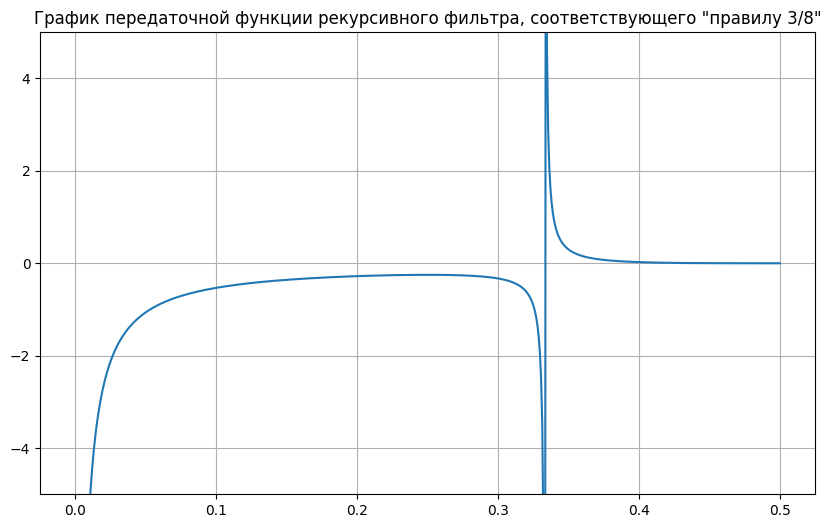

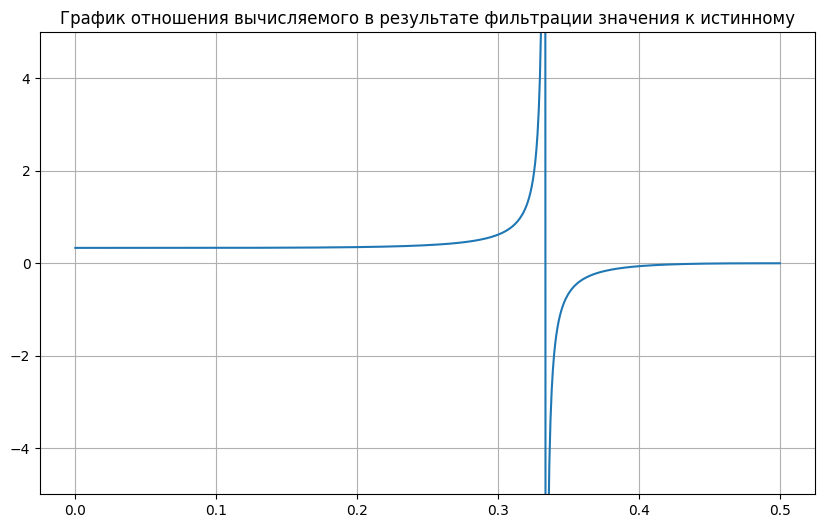

In [ ]:
def model_transfer_function_for_rule_3_8(frequences):
  return ((np.cos(3 * np.pi * frequences) + 3 * np.cos(np.pi * frequences))/(8j * np.sin(3 * np.pi * frequences))).imag
def model_ratio_to_true_for_rule_3_8(frequences):
  return 2 * np.pi * frequences * ((np.cos(3 * np.pi * frequences) + 3 * np.cos(np.pi * frequences))/(8 * np.sin(3 * np.pi * frequences)))
plot_for_transfer_function(frequences, model_transfer_function_for_rule_3_8, 'График передаточной функции рекурсивного фильтра, соответствующего "правилу 3/8"')
plot_for_transfer_function(frequences, model_ratio_to_true_for_rule_3_8, "График отношения вычисляемого в результате фильтрации значения к истинному")

После нормализации исходного частотного диапазона сигнала к интервалу [0, 0.5] *Гц* и расчёта передаточной функции для новых значений наблюдаются следующие свойства:

- Графики показывают, что передаточная функция ${\tilde H(f)}$ рекурсивного фильтра, реализующего **«правило 3/8»**, на малых и средних частотах **[0.0; 0.3] *Гц*** ослабляет амплитуду сигнала **в три раза**. Приблизительно на частоте **0.33 *Гц*** наблюдается **разрыв**. Фильтр полностью подавляет сигнал на частотах, превышающих **0.4 *Гц***.

## Задание 3

Анализ графиков позволяет выявить следующие особенности методов интегрирования:

*   **Метод прямоугольников** обеспечивает точное интегрирование в области **низких частот**, однако на **средних и высоких частотах** приводит к возникновению искажений.

*   **Метод трапеций**, напротив, **эффективно подавляет высокочастотные составляющие**, но может проявлять **недостаточную точность в среднем частотном диапазоне**.

*   **Метод Симпсона** отличается **высокой точностью на низких и средних частотах**. Его ключевым недостатком является **усиление сигнала на высоких частотах**, что может стать причиной значительных искажений.

*   **Метод «3/8»** ослабляет сигнал в области **малых и средних частот**. Характерной особенностью является наличие **точки разрыва на частоте ~1/3 от максимальной**, а также **полное подавление высокочастотных компонент**.

### Практические следствия:
- **Для работы с низкочастотными сигналами** оптимален метод прямоугольников.
- **Для подавления высокочастотных шумов** наиболее эффективен метод трапеций.
- **Для задач, требующих точности в широкой полосе низких и средних частот**, предпочтительнее метод Симпсона (при условии отсутствия критичных высокочастотных составляющих).
- **Метод «3/8»** имеет ограниченную область применения из-за наличия точки разрыва в передаточной функции.

## Выводы

В рамках лабораторной работы был выполнен сравнительный анализ амплитудно-частотных характеристик, соответствующих различным квадратурным формулам численного интегрирования: методам прямоугольников, трапеций, Симпсона и правилу 3/8. Эксперимент продемонстрировал влияние выбранного метода интегрирования на качество обработки сигналов, в частности, на сохранение их низкочастотных составляющих и уровень подавления высокочастотного шума.

Изучение характеристик рекурсивных фильтров, построенных на основе данных квадратур, выявило, что более сложные алгоритмы (например, метод Симпсона) обеспечивают повышенную точность интегрирования и меньший уровень искажений. В то же время, формула 3/8 обладает узкой областью применения из-за особенностей своей передаточной функции, которая имеет разрыв при значении частоты, равном приблизительно 1/3 от верхней границы диапазона.

Графическое представление передаточных функций и отношений рассчитанных значений к эталонным позволило исследовать поведение каждого фильтра в различных частотных диапазонах и оценить их эффективность для задачи подавления шума.

Полученные результаты свидетельствуют о том, что корректный подбор метода интегрирования является фактором, определяющим итоговое качество обработки данных и производительность фильтрации в прикладных задачах цифровой обработки сигналов.